In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.decomposition import PCA
import seaborn as sns

In [31]:
df = pd.read_csv("HeartFailure.csv")
df.head()

,ID,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,2,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,3,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,4,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,5,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [32]:
df_cluster = df.iloc[:,1:13]
df_cluster.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


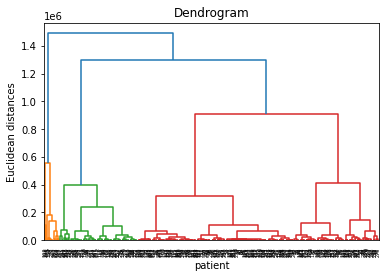

In [33]:
#function to create dendrogram to find optimal number of cluster
def dendrogram(df,linkage):
    dendrogram = sch.dendrogram(sch.linkage(df, method  = linkage))
    plt.title('Dendrogram')
    plt.xlabel('patient')
    plt.ylabel('Euclidean distances')
    return plt.show()

dendrogram(df_cluster,"ward")

In [51]:
#function to perform agglomerative clustering
def agglomerative(df,n,metric,linkage):
    agglomerative_clustering = AgglomerativeClustering(n_clusters = n, affinity = metric, linkage = linkage)
    df["cluster"] = agglomerative_clustering.fit_predict(df)
    return df


In [52]:
df_cluster1 = agglomerative(df_cluster,3,"euclidean","ward")
df_cluster1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cluster,PC1,PC2
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,0,3283.938812,-0.291804
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,0,3.533036,14558.509937
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,2,-202716.266581,-822.277382
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,0,-106716.286171,-915.544164
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,0,127283.730412,-874.381467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,2,-216716.302608,-989.292920
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,13284.544562,2472.889602
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,1,957284.633782,2723.750850
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,2,-246715.159611,3722.000238


In [53]:
df_cluster1.cluster.unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

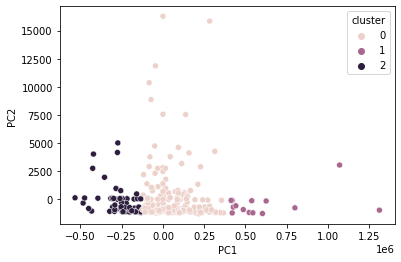

In [54]:
def visualization(df):
    pca = PCA(2)
    
    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]

 
    plot = sns.scatterplot(data=df,x="PC1",y="PC2",hue=df['cluster'])
    return plot

visualization(df_cluster1)
